In [21]:
import networkx as nx
import random
import matplotlib.pyplot as plt

First we will create a class that can display graph both as an adjacency matrix and as adjacency lists. 
Next we need to set up the Kruskul's algorithm. To do that we need to use Union Find. 
Then, using created functions, define the Kruskal's algorithm.

In [28]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph_list = [] #adjacency list
        self.graph_matrix = [[0] * vertices for value in range(vertices)] #generates a list of lists where length depends on the number of vertices

    def add_edge_list(self, u, v, w):
        self.graph_list.append((u, v, w))
        
    def add_edge_matrix(self, u, v, w): #u, v - dif vertices, w - weight
        self.graph[u][v] = w
        self.graph[v][u] = w #works both ways for undirected graph
       
    #Union Find 
    def find(self, parent, element): 
        if parent[element] == element:   
            return element 
        else: #recursion 
            result = find(parent[element]) 
            parent[element] = result 
            return result 
        
    def union(self, parent, rank, x, y): #x, y - dif sets
        xroot = find(parent, x)
        yroot = find(parent, y)
        if rank[xroot] < rank[yroot]: #smaller rank tree under higher rank tree
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else: #if ranks are tha same just add up to one of them
            parent[yroot] = xroot
            rank[xroot] += 1

    def kruskal_algorithm(graph):
        mst = []  #minimum spanning tree
        i = 0 #already sorted edges
        e = 0 #number of edges added to mst
        graph.graph = sorted(graph.graph, key=lambda item: item[2])
        parent = []
        rank = []
        for vertice in range(graph.V):
            parent.append(vertice)
            rank.append(0)
        while e < graph.V - 1: #finding the smallest edge and adding it to i, then going upwards
            u, v, w = graph.graph[i]
            i = i + 1
            x = find(parent, u)
            y = find(parent, v)
            if x != y:
                e = e + 1
                mst.append((u, v, w))
                union(parent, rank, x, y)
        return mst

        
    def display(self, adjacency_matrix=False):
        if adjacency_matrix:
            for row in self.graph_matrix:
                print(" ".join(map(str, row))) #converts rows to strings and joins with spaces
        else:
            G = nx.Graph() #network library
            G.add_weighted_edges_from(self.graph_list)
            edge_labels = {(u, v): str(w) for u, v, w in self.graph_list}  # Create a dictionary of edge labels
            nx.draw(G, with_labels=True)
            nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G), edge_labels=edge_labels)
            

0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0


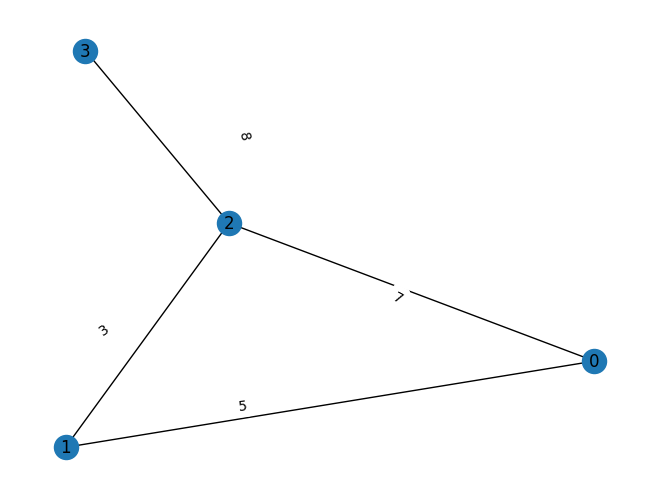

In [32]:
graph = Graph(5)

graph.add_edge_list(0, 1, 5)
graph.add_edge_list(0, 2, 7)
graph.add_edge_list(1, 2, 3)
graph.add_edge_list(2, 3, 8)

graph.display()

graph.display(adjacency_matrix=True)

In [30]:
def generate_random_graph(n_vertices, n_edges):
    graph = Graph(n_vertices)
    for value in range(n_edges):
        u = random.randint(0, n_vertices-1)
        v = random.randint(0, n_vertices-1)
        w = random.randint(1, 10) #weight varies from 1 up to 10
        graph.add_edge(u, v, w)
    return graph